# Ejercicios Prácticos. Nivel Avanzado

![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png)

Más información en: https://pycaret.org y https://www.kaggle.com/frtgnn/pycaret-introduction-classification-regression


# Instalación de Pycaret

In [1]:
import numpy as np 
import pandas as pd 
"""
from google.colab import drive
drive.mount("/content/gdrive")
from google.colab import files
"""

'\nfrom google.colab import drive\ndrive.mount("/content/gdrive")\nfrom google.colab import files\n'

In [ ]:
!pip install pycaret

# Regresión: Estimación del valor de la vivienda

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSYeyNpaoAW-3rFX9-ORmiJ-uLAAswYBRhszs2QzllV7MCfFPvk&usqp=CAU)

# Importa todo el paquete de regresión

In [2]:
from pycaret.regression import *

# Analisis de los datos

In [3]:
"""
uploaded_train = files.upload()
uploaded_test = files.upload()
uploaded_sample = files.upload()

Original code: """
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')
sample= pd.read_csv('data/sample_submission.csv')
"""

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sample= pd.read_csv('sample_submission.csv')
"""

"\n\ntrain = pd.read_csv('train.csv')\ntest  = pd.read_csv('test.csv')\nsample= pd.read_csv('sample_submission.csv')\n"

In [5]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Analysis Exploratorio (EDA)

In [7]:
import pandas_profiling as prof
## Realiza el analisis exploratorio con pandas-profiling, utilizando el parametro "minimal=True"
# minimal = True : Calcula sólo las funciones básicas para ahorrar recursos.
var_prof = prof.ProfileReport(train, title='Downloads', minimal=True)
var_prof

### Separación de datos para validación

In [4]:
#check the shape of data
train.shape

(1460, 81)

In [6]:
## separa un conjunto de datos para la validacion del modelo
data = train.sample(frac=0.9, random_state=786)
data_unseen = train.drop(data.index)

train.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (1460, 81)
Unseen Data For Predictions (146, 81)


# Set up del entorno (pre-procesamiento)

In [7]:
## Establece el entorno de trabajo (reg) con un preprocesamiento avanzado en vase a las conclusiones del EDA
reg = setup(train, target = 'SalePrice', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             transformation = True, transformation_method = 'yeo-johnson', transform_target = True,
             numeric_features=['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 
                               'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                               'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea'],
             ordinal_features= {'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
                                'ExterCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'BsmtQual' : ['Fa', 'TA', 'Gd', 'Ex'], 
                                'BsmtCond' : ['Po', 'Fa', 'TA', 'Gd'],
                                'BsmtExposure' : ['No', 'Mn', 'Av', 'Gd'],
                                'HeatingQC' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'KitchenQual' : ['Fa', 'TA', 'Gd', 'Ex'],
                                'FireplaceQu' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'GarageCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                'PoolQC' : ['Fa', 'Gd', 'Ex']},
            # Order in ordinal data must be specifyed in the code.
             polynomial_features = True, 
             trigonometry_features = True, 
             remove_outliers = True, outliers_threshold = 0.08,
            # Remove outlier that overpass thereshold = 0.8
             silent = True #silent is set to True for unattended run during kernel execution
             )

 
Setup Succesfully Completed.


# Entrenamiento y comparación de diferentes modelos

In [8]:
## compara un conjunto de modelos excluyendo el tr
compare_models(exclude = ['tr']) 

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

# Entrenamiento de Modelos

In [9]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm                  Support Vector Machine   
knn                   K Neighbors Regressor   
dt                            Decision Tree   
rf                            Random Forest   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                  Multi Level Perceptron   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   

                                           Reference  Turbo  
ID                                                           
lr             sklearn.linear_model.LinearRegression   True  
lasso                     sklearn.linear_model.Lasso   True  
ridge                     sklearn.linear_model.Ridge   True  
en                   sklearn.linear_model.ElasticNet   True  
lar                        sklearn.linear_model.Lars   True  
llar                  sklearn.linear_model.LassoLars   True  
omp                         sklearn.linear_model.OMP   True  
br                sklearn.linear_model.BayesianRidge   True  
ard               sklearn.linear_model.ARDRegression  False  
par                         sklearn.linear_model.PAR   True  
ransac          sklearn.linear_model.RANSACRegressor   True  
tr            sklearn.linear_model.TheilSenRegressor   True  
huber            sklearn.linear_model.HuberRegressor   True  
kr                  sklearn.kernel_ridge.KernelRidge  False  
svm                                  sklearn.svm.SVR   True  
knn            sklearn.neighbors.KNeighborsRegressor   True  
dt                sklearn.tree.DecisionTreeRegressor   True  
rf            sklearn.ensemble.RandomForestRegressor   True  
et              sklearn.ensemble.ExtraTreesRegressor   True  
ada               sklearn.ensemble.AdaBoostRegressor   True  
gbr       sklearn.ensemble.GradientBoostingRegressor   True  
mlp              sklearn.neural_network.MLPRegressor  False  
xgboost                       xgboost.readthedocs.io   True  
lightgbm               github.com/microsoft/LightGBM   True  
catboost                         https://catboost.ai   True

In [10]:
## crea el modelo de huber

# verbose = False: To not show some information in the output
huber = create_model('huber', verbose = False)

In [11]:
## crea el modelo de omp
omp = create_model('omp', verbose = False)

In [12]:
## crea el modelo de br
br = create_model('br', verbose = False)

In [13]:
## crea el modelo de lightgbm
lightgbm = create_model('lightgbm', verbose = False)

# Optimización del modelo

In [14]:
## optimiza el modelo de huber
huber = tune_model(huber, n_iter = 50)

In [15]:
## optimiza el modelo de omp
omp = tune_model(omp, n_iter = 50)

In [16]:
## optimiza el modelo de lightgbm
lightgbm = tune_model(lightgbm, n_iter = 50)

In [17]:
## optimiza el modelo de br
br = tune_model(br, n_iter = 50)

## Ensamblado de modelos

In [18]:
## genera un ensamblado con los modelos [huber, omp, lightgbm, br])
blend_all = blend_models(estimator_list = [huber, omp, lightgbm, br])

## Evaluación de modelos

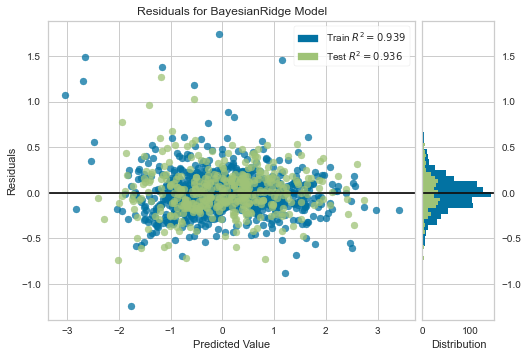

In [19]:
## evalua el modelo en base a los residuals
plot_model(br, plot = 'residuals')

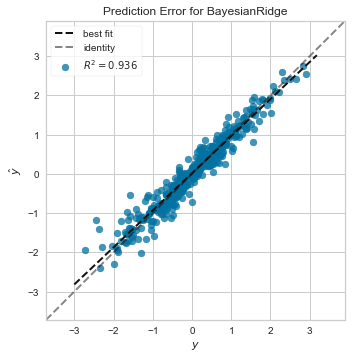

In [20]:
## evalua el modelo en base al error de prediccion
plot_model(br, plot = 'error')

**De las dos gráficas anteriores se aprecia que el modelo es bueno.**

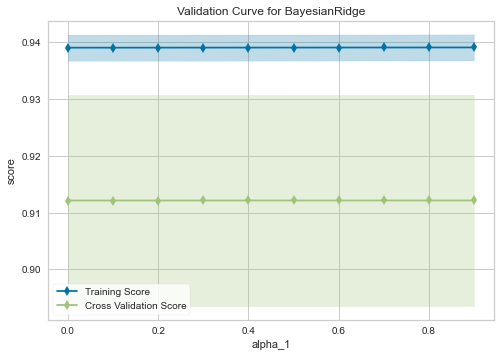

In [21]:
## evalua el modelo si hay overfitting
plot_model(br, plot = 'vc')

**Se aprecian signos de underfitting aunque no muy pronunciados.**

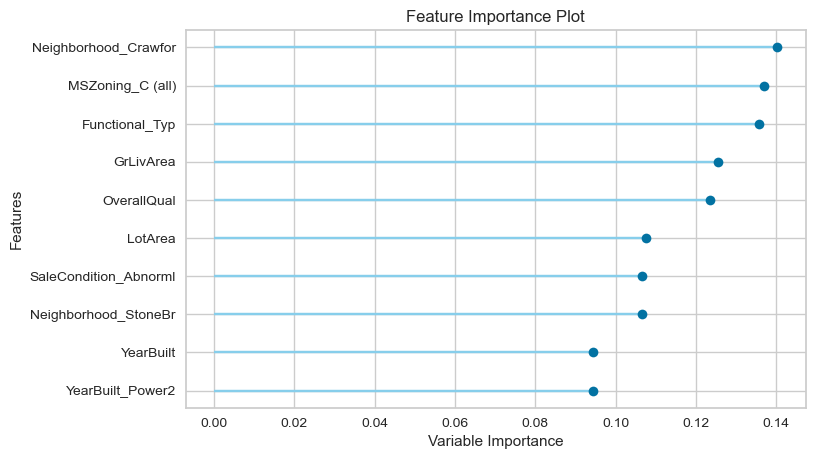

In [22]:
## evalua el modelo en basela importancia de caracteristicas
plot_model(br, plot = 'feature')

**Todas las características son importantes para el modelo.**

# Interpretación del modelo

In [24]:
!pip install shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
              n_estimators=200, n_jobs=-1, num_leaves=30, objective=None,
              random_state=123, reg_alpha=0.6, reg_lambda=0.8, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


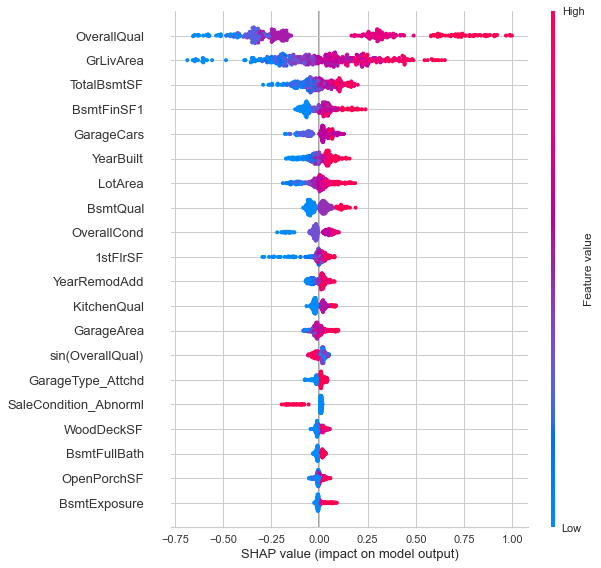

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [33]:
## interpreta el modelo de lightgbm
interpret_model(lightgbm)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
              n_estimators=200, n_jobs=-1, num_leaves=30, objective=None,
              random_state=123, reg_alpha=0.6, reg_lambda=0.8, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), plot=correlation, feature=TotalBsmtSF, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: correlation
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


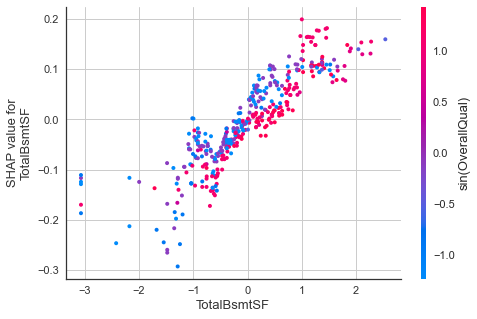

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [34]:
interpret_model(lightgbm, plot = 'correlation', feature = 'TotalBsmtSF')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
              n_estimators=200, n_jobs=-1, num_leaves=30, objective=None,
              random_state=123, reg_alpha=0.6, reg_lambda=0.8, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), plot=correlation, feature=TotalBsmtSF, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: correlation
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


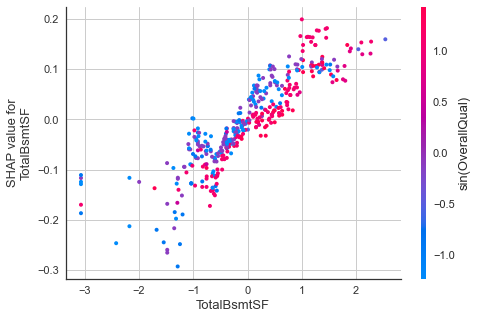

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [35]:
## interpreta el modelo analizando que hace que varie el precio 
interpret_model(lightgbm, plot = 'correlation', feature = 'TotalBsmtSF')

## Finalizacion del Modelo

In [27]:
# check predictions on hold-out
predict_model(blend_all);

Model         MAE           MSE        RMSE      R2   RMSLE  \
0  Voting Regressor  12109.9392  2.930031e+08  17117.3324  0.9486  0.0951   

     MAPE  
0  0.0703

In [29]:
## finaliza el modelo
final_blender = finalize_model(blend_all)
print(final_blender)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=VotingRegressor(estimators=[('Huber Regressor_0',
                             HuberRegressor(alpha=0.1621, epsilon=1.1,
                                            fit_intercept=True, max_iter=100,
                                            tol=1e-05, warm_start=False)),
                            ('Orthogonal Matching Pursuit_1',
                             OrthogonalMatchingPursuit(fit_intercept=True,
                                                       n_nonzero_coefs=68,
                                                       normalize=True,
                                                       precompute='auto',
                                                       tol=None)),
                            ('Light Gradient Boosting Machine_2',
                             LGBMRegressor(boosting_type=...
                                           reg_alpha=0.6, reg_lambda=0.8,
                              

VotingRegressor(estimators=[('Huber Regressor_0',
                             HuberRegressor(alpha=0.1621, epsilon=1.1,
                                            fit_intercept=True, max_iter=100,
                                            tol=1e-05, warm_start=False)),
                            ('Orthogonal Matching Pursuit_1',
                             OrthogonalMatchingPursuit(fit_intercept=True,
                                                       n_nonzero_coefs=68,
                                                       normalize=True,
                                                       precompute='auto',
                                                       tol=None)),
                            ('Light Gradient Boosting Machine_2',
                             LGBMRegressor(boosting_type=...
                                           reg_alpha=0.6, reg_lambda=0.8,
                                           silent=True, subsample=1.0,
                              

## Predicciones con datos de test

In [30]:
## realiza una prediccion con los datos de test
predictions = predict_model(final_blender, data = test)
predictions.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
index                                                                          
0      1461          20       RH         80.0    11622   Pave   NaN      Reg   
1      1462          20       RL         81.0    14267   Pave   NaN      IR1   
2      1463          60       RL         74.0    13830   Pave   NaN      IR1   
3      1464          60       RL         78.0     9978   Pave   NaN      IR1   
4      1465         120       RL         43.0     5005   Pave   NaN      IR1   

      LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
index                        ...                                              
0             Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1             Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2             Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3             Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4             HLS    AllPub  ...        0    NaN    NaN         NaN       0   

      MoSold YrSold  SaleType  SaleCondition        Label  
index                                                      
0          6   2010        WD         Normal  125300.4005  
1          6   2010        WD         Normal  162810.7272  
2          3   2010        WD         Normal  189784.5033  
3          6   2010        WD         Normal  199250.0023  
4          1   2010        WD         Normal  199779.2693  

[5 rows x 81 columns]

## Validación del modelo: predicción con datos no vistos

In [31]:
## valida el modelo, analizando los resultados con los datos de test y los datos no vistos
unseen_predictions = predict_model(final_blender, data=data_unseen)
unseen_predictions.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
index                                                                        
0       6          50       RL         85.0    14115   Pave   NaN      IR1   
1       8          60       RL          NaN    10382   Pave   NaN      IR1   
2      14          20       RL         91.0    10652   Pave   NaN      IR1   
3      18          90       RL         72.0    10791   Pave   NaN      Reg   
4      33          20       RL         85.0    11049   Pave   NaN      Reg   

      LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
index                        ...                                            
0             Lvl    AllPub  ...    NaN  MnPrv        Shed     700     10   
1             Lvl    AllPub  ...    NaN    NaN        Shed     350     11   
2             Lvl    AllPub  ...    NaN    NaN         NaN       0      8   
3             Lvl    AllPub  ...    NaN    NaN        Shed     500     10   
4             Lvl    AllPub  ...    NaN    NaN         NaN       0      1   

      YrSold SaleType  SaleCondition  SalePrice        Label  
index                                                         
0       2009       WD         Normal     143000  166710.5400  
1       2009       WD         Normal     200000  221912.5864  
2       2007      New        Partial     279500  236661.7019  
3       2006       WD         Normal      90000  104747.5868  
4       2008       WD         Normal     179900  185104.3046  

[5 rows x 82 columns]

## Despliegue del modelo en Mlfow

In [32]:
## despliega el modelo en MlFlow<
!mlflow ui

^C


Se agregó un documento aparte para mostrar las características del modelo guardado **CatBoosting**.